In [49]:
!pip install kaggle

In [50]:
import kagglehub

path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [51]:
import pandas as pd
import os

year_path = os.path.join(path, "2022")  # Construct the path to the 2022 directory

if os.path.exists(year_path) and os.path.isdir(year_path):
    file_names = os.listdir(year_path)
    for file_name in file_names:
      if file_name == "heart_2022_with_nans.csv":
        file_path = os.path.join(year_path, file_name)
        try:
          df = pd.read_csv(file_path)
          print("Successfully loaded heart_2022_with_nans.csv")
          break # Exit the loop after finding the file
        except FileNotFoundError:
          print(f"File '{file_path}' not found.")
        except pd.errors.ParserError:
          print(f"Error parsing '{file_path}'. Check file format.")
        except Exception as e:
          print(f"An unexpected error occurred: {e}")
    else:
        print("heart_2022_with_nans.csv not found in the 2022 directory.")
else:
    print(f"Directory '{year_path}' not found or is not a directory")


Successfully loaded heart_2022_with_nans.csv


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [53]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [54]:
df.select_dtypes(include=['object']).nunique()

,0
State,54
Sex,2
GeneralHealth,5
LastCheckupTime,4
PhysicalActivities,2
RemovedTeeth,4
HadHeartAttack,2
HadAngina,2
HadStroke,2
HadAsthma,2


In [55]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


In [56]:
df.duplicated().sum()

157

In [57]:
df.dropna(inplace=True)

In [58]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [59]:
analysis = {}

for column in df.columns:
    # Get unique values and their counts
    value_counts = df[column].value_counts()
    unique_count = len(value_counts)

    dtype = str(df[column].dtype)

    analysis[column] = {
        'dtype': dtype,
        'unique_count': unique_count,
        'unique_values': list(value_counts.index),
        'value_counts': value_counts.to_dict()
    }

for column, details in analysis.items():
    print("\n" + "="*50)
    print(f"Column: {column}")
    print(f"Data Type: {details['dtype']}")
    print(f"Number of Unique Values: {details['unique_count']}")
    print("Unique Values:")
    unique_values = [str(val) for val in details['unique_values']]
    print(f"[{', '.join(unique_values)}]")


Column: State
Data Type: object
Number of Unique Values: 54
Unique Values:
[Washington, Maryland, Minnesota, Ohio, New York, Texas, Florida, Kansas, Wisconsin, Maine, Iowa, Hawaii, Virginia, Indiana, South Carolina, Massachusetts, Arizona, Utah, Michigan, Colorado, Nebraska, California, Connecticut, Georgia, Vermont, South Dakota, Montana, Missouri, New Jersey, New Hampshire, Puerto Rico, Idaho, Alaska, Rhode Island, Oregon, Louisiana, West Virginia, New Mexico, Oklahoma, Arkansas, Pennsylvania, Tennessee, Illinois, North Carolina, North Dakota, Mississippi, Kentucky, Wyoming, Delaware, Alabama, Nevada, District of Columbia, Guam, Virgin Islands]

Column: Sex
Data Type: object
Number of Unique Values: 2
Unique Values:
[Female, Male]

Column: GeneralHealth
Data Type: object
Number of Unique Values: 5
Unique Values:
[Very good, Good, Excellent, Fair, Poor]

Column: PhysicalHealthDays
Data Type: float64
Number of Unique Values: 31
Unique Values:
[0.0, 30.0, 2.0, 1.0, 3.0, 5.0, 10.0, 7.0,

next steps

* plotting for categorical

* plotting for numerical

* convert categorical to numerical

* correlation map/heat map

* normalize numerical

*  additional plotting w.r.t certain columns based on corelation

Text(0, 0.5, 'Count')

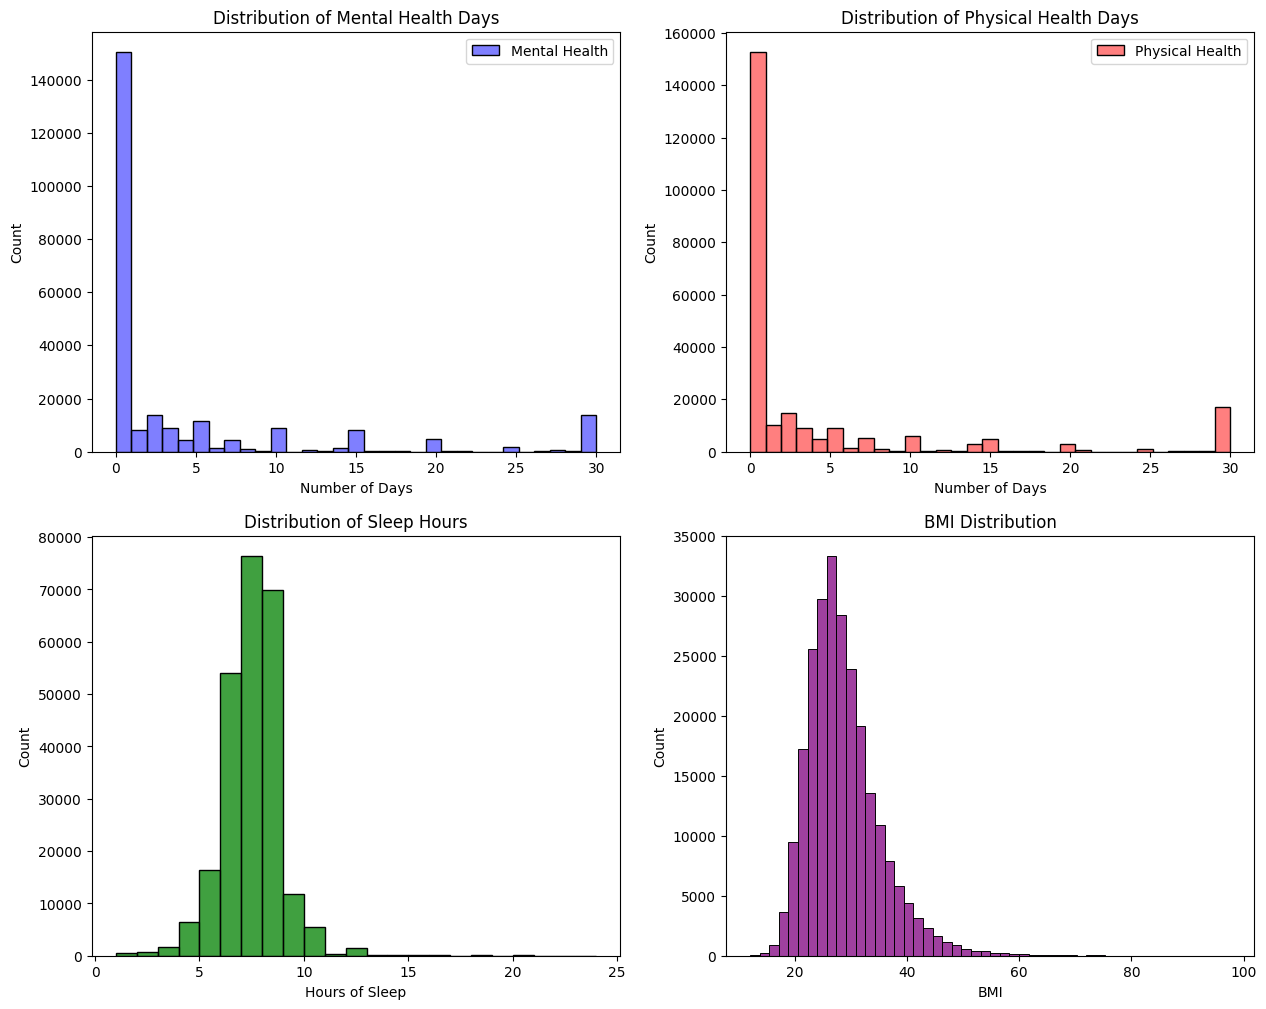

In [60]:
#plooting numerical column distribution

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig = plt.figure(figsize=(15, 12))

# 1. Mental and physical Health Days Distribution
ax1 = plt.subplot(2, 2, 1)
sns.histplot(data=df, x='MentalHealthDays', bins=31, color='blue', alpha=0.5, label='Mental Health')
plt.title('Distribution of Mental Health Days')
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.legend()

ax1 = plt.subplot(2, 2, 2)
sns.histplot(data=df, x='PhysicalHealthDays', bins=31, color='red', alpha=0.5, label='Physical Health')
plt.title('Distribution of Physical Health Days')
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.legend()

# 2. Sleep Hours Distribution
ax2 = plt.subplot(2, 2, 3)
sns.histplot(data=df, x='SleepHours', bins=23, color='green')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Hours of Sleep')
plt.ylabel('Count')

# 3. BMI Distribution
ax3 = plt.subplot(2, 2, 4)
sns.histplot(data=df, x='BMI', bins=50, color='purple')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')


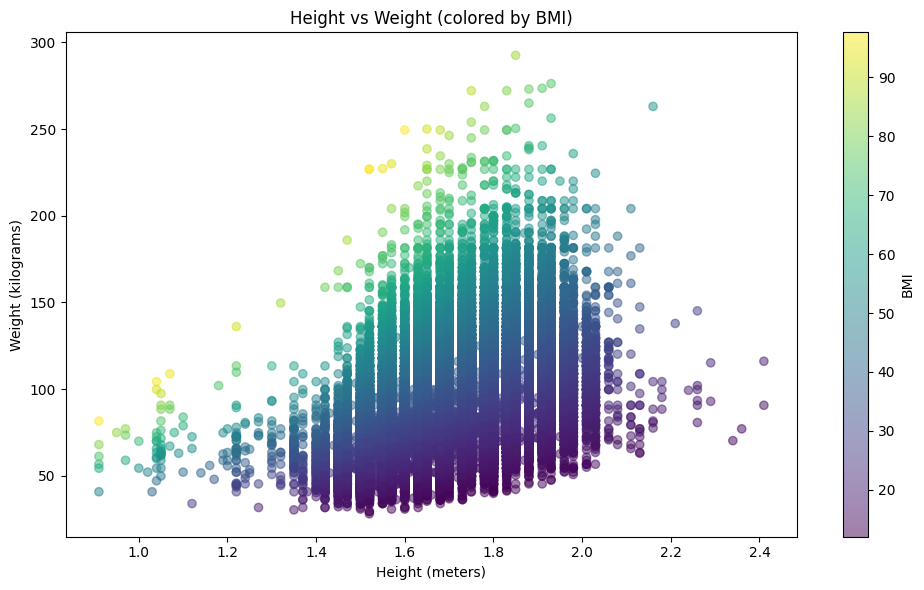

In [61]:
#Weight vs Height Scatter Plot with BMI color coding
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['HeightInMeters'],
                     df['WeightInKilograms'],
                     c=df['BMI'],
                     cmap='viridis',
                     alpha=0.5)
plt.colorbar(scatter, label='BMI')
plt.title('Height vs Weight (colored by BMI)')
plt.xlabel('Height (meters)')
plt.ylabel('Weight (kilograms)')

plt.tight_layout()
plt.show()

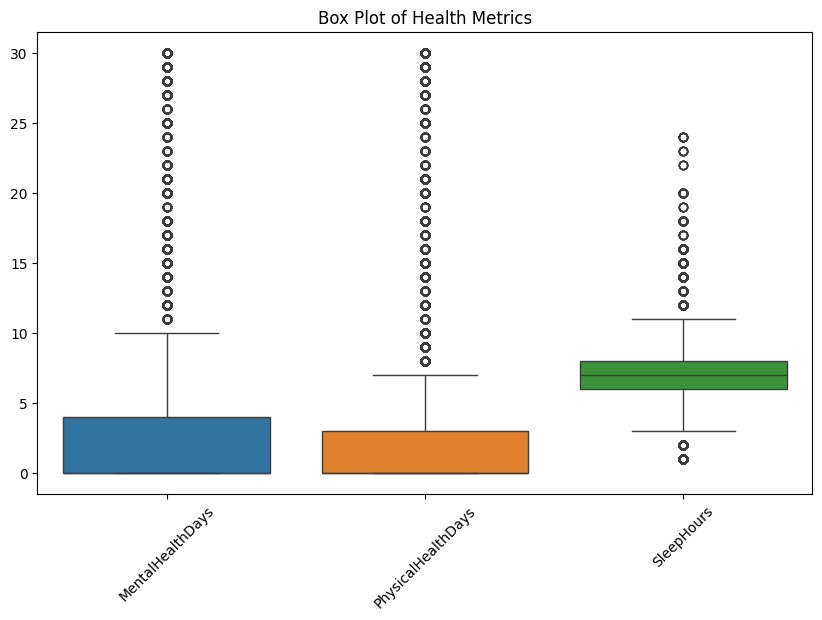

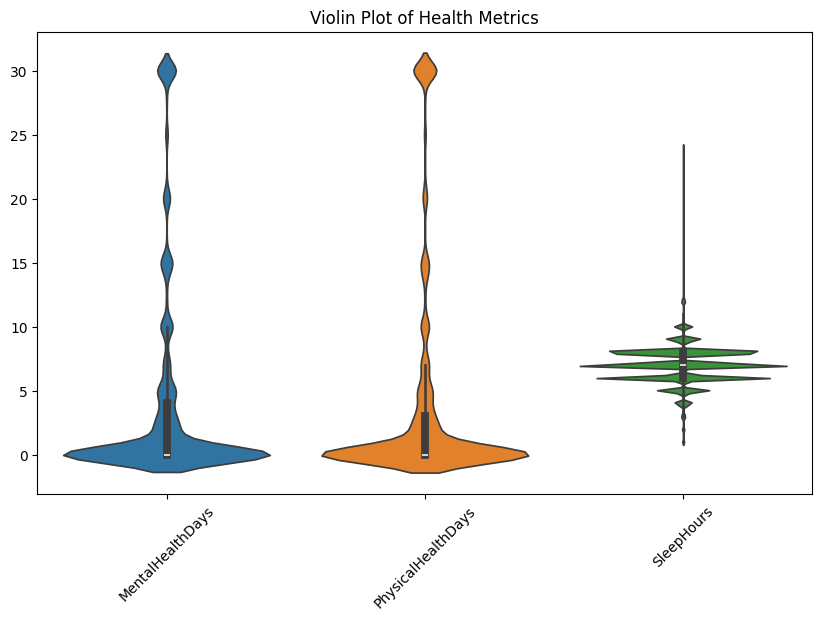

In [62]:
# Box plots for health days
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MentalHealthDays', 'PhysicalHealthDays', 'SleepHours']])
plt.title('Box Plot of Health Metrics')
plt.xticks(rotation=45)
plt.show()

# Violin plots to show distribution shape
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['MentalHealthDays', 'PhysicalHealthDays', 'SleepHours']])
plt.title('Violin Plot of Health Metrics')
plt.xticks(rotation=45)
plt.show()

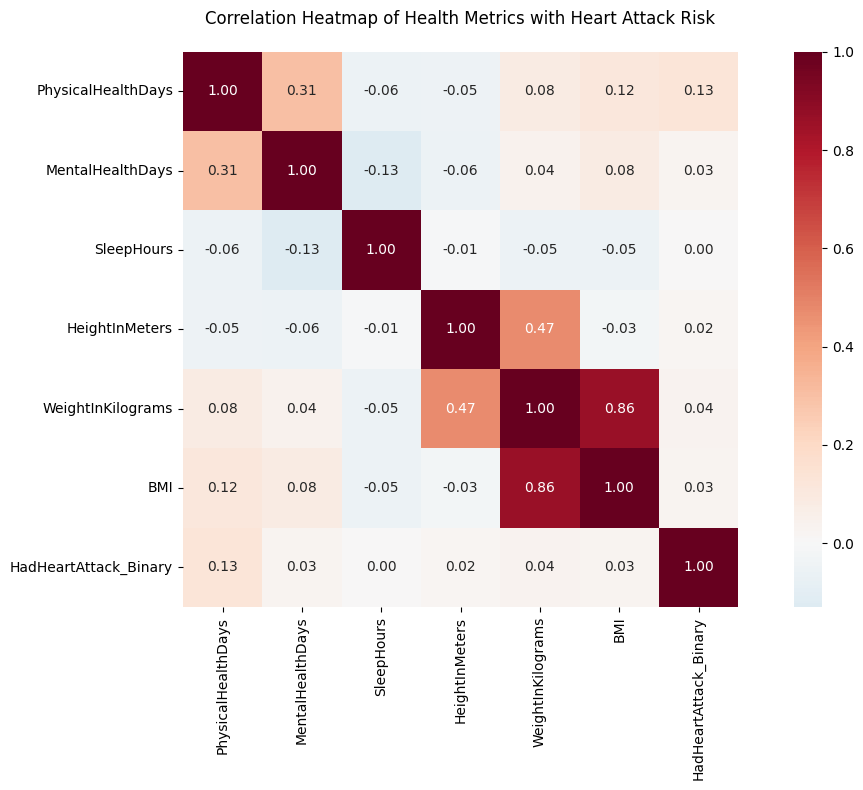

In [63]:
#correlation heatmap for numerical columns(health metrics)

df = df.copy()
df['HadHeartAttack_Binary'] = (df['HadHeartAttack'] == 'Yes').astype(int)

numerical_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack_Binary']

corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            square=True)

plt.title('Correlation Heatmap of Health Metrics with Heart Attack Risk', pad=20)
plt.tight_layout()
plt.show()

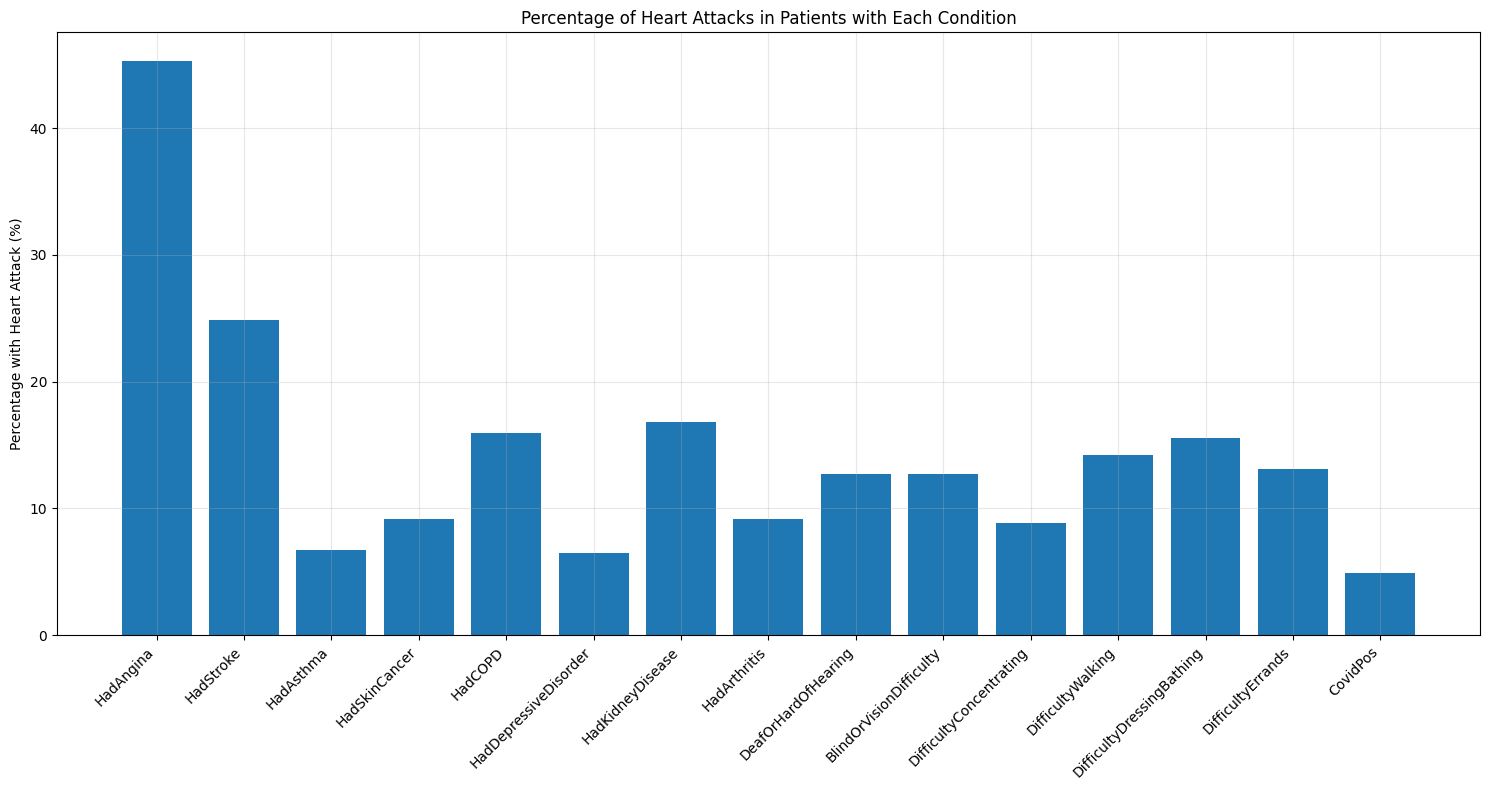

In [64]:
#symptoms vs heart disease
condition_cols = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
                     'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
                     'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
                     'DifficultyConcentrating', 'DifficultyWalking',
                     'DifficultyDressingBathing', 'DifficultyErrands','CovidPos']



# 1. Bar Plot: Percentage of Heart Attacks by Condition
plt.figure(figsize=(15, 8))
percentages = []
for col in condition_cols:
    heart_attack_rate = (df[df[col] == 'Yes']['HadHeartAttack'] == 'Yes').mean() * 100
    percentages.append(heart_attack_rate)

plt.bar(range(len(condition_cols)), percentages)
plt.xticks(range(len(condition_cols)), condition_cols, rotation=45, ha='right')
plt.title('Percentage of Heart Attacks in Patients with Each Condition')
plt.ylabel('Percentage with Heart Attack (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

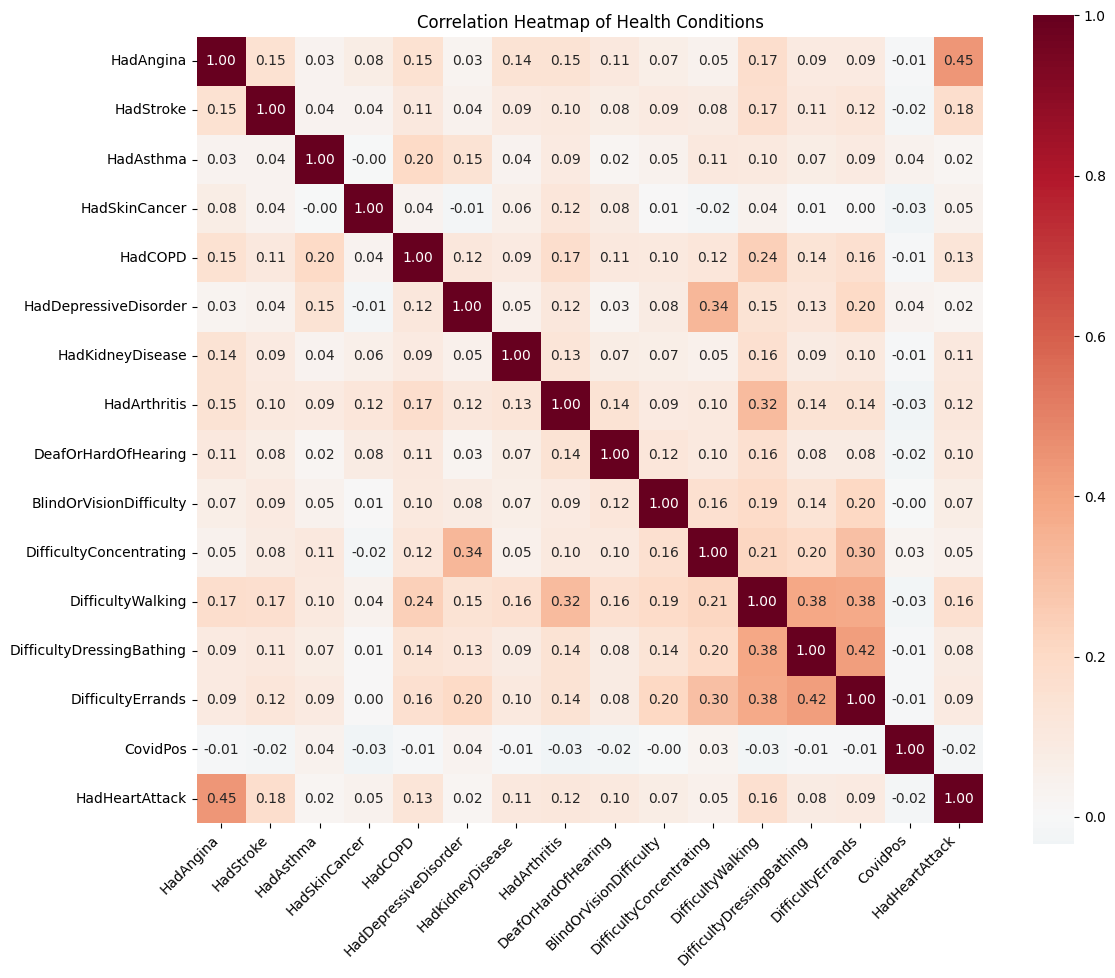

In [65]:

#correlation heatmap of health conditions

binary_df = df.copy()
for col in condition_cols + ['HadHeartAttack']:
    binary_df[col] = (binary_df[col] == 'Yes').astype(int)

plt.figure(figsize=(12, 10))
correlation_matrix = binary_df[condition_cols + ['HadHeartAttack']].corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Heatmap of Health Conditions')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

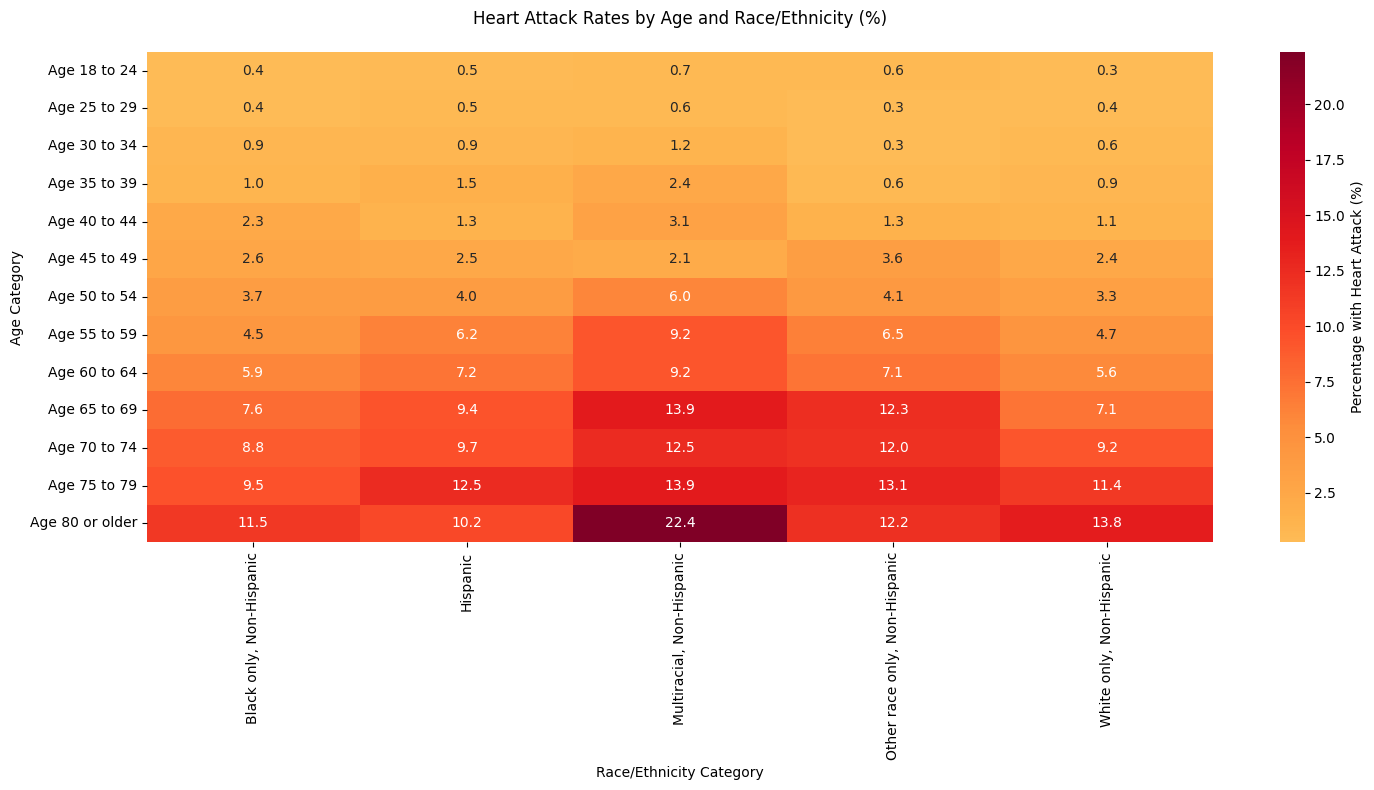

In [66]:
#Calculate percentage of heart attacks for each age-race combination
plt.figure(figsize=(15, 8))
combined_rates = pd.crosstab(
    [df['AgeCategory'], df['RaceEthnicityCategory']],
    df['HadHeartAttack'],
    normalize='index'
)['Yes'] * 100


heatmap_data = combined_rates.unstack()

sns.heatmap(heatmap_data,
            cmap='YlOrRd',
            annot=True,
            fmt='.1f',
            cbar_kws={'label': 'Percentage with Heart Attack (%)'},
            center=heatmap_data.mean().mean())

plt.title('Heart Attack Rates by Age and Race/Ethnicity (%)', pad=20)
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Age Category')
plt.tight_layout()
plt.show()

Text(0.5, 1.05, 'Heart Attack Risk Analysis')

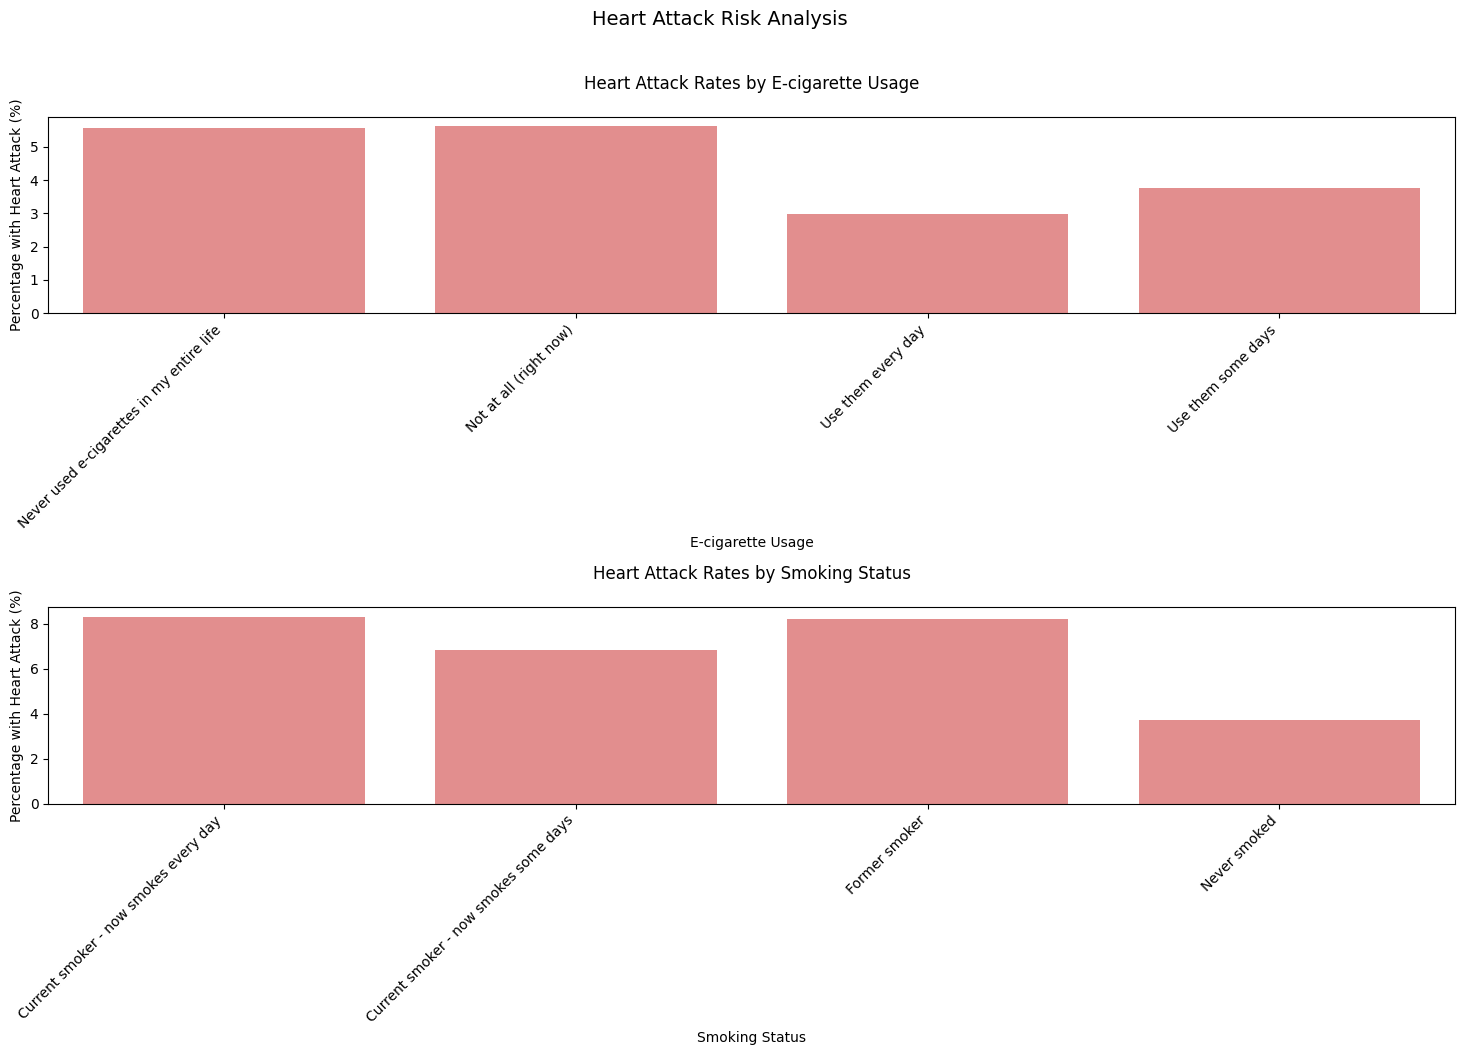

In [67]:
#risk analysis w.r.t smoking

plt.figure(figsize=(15, 10))


# Plot 1: E-cigarette Usage vs Heart Attack
plt.subplot(2, 1, 1)
ecigarette_counts = pd.crosstab(df['ECigaretteUsage'], df['HadHeartAttack'], normalize='index') * 100
sns.barplot(x=ecigarette_counts.index, y=ecigarette_counts['Yes'],color='lightcoral')

plt.title('Heart Attack Rates by E-cigarette Usage', pad=20, fontsize=12)
plt.xlabel('E-cigarette Usage')
plt.ylabel('Percentage with Heart Attack (%)')
plt.xticks(rotation=45, ha='right')

# Plot 2: Smoking Status vs Heart Attack
plt.subplot(2, 1, 2)
smoking_counts = pd.crosstab(df['SmokerStatus'], df['HadHeartAttack'], normalize='index') * 100
sns.barplot(x=smoking_counts.index,  y=smoking_counts['Yes'],color='lightcoral')

plt.title('Heart Attack Rates by Smoking Status', pad=20, fontsize=12)
plt.xlabel('Smoking Status')
plt.ylabel('Percentage with Heart Attack (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Add overall title
plt.suptitle('Heart Attack Risk Analysis', fontsize=14, y=1.05)

In [68]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack_Binary
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0


In [69]:
#converting bmi and hadheatattack

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obesity (Class I)'
    elif 35 <= bmi < 40:
        return 'Obesity (Class II)'
    else:
        return 'Obesity (Class III)'


def classify_heart_attack(value):
    if value == 'No':
        return 0
    elif value == 'Yes':
        return 1

# Apply the classification function to the BMI column
df['BMI'] = df['BMI'].apply(classify_bmi)
df['HadHeartAttack'] = df['HadHeartAttack'].apply(classify_heart_attack)

In [70]:
# Ordinal encoding
# Ordinal Encoding requires sorted values

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Excellent','Very good','Good','Fair','Poor']])
df['GeneralHealth'] = encoder.fit_transform(df[['GeneralHealth']])
df = pd.get_dummies(df, columns=['GeneralHealth'], prefix=['GeneralHealth'])

encoder = OrdinalEncoder(categories=[['Within past year (anytime less than 12 months ago)','Within past 2 years (1 year but less than 2 years ago)','Within past 5 years (2 years but less than 5 years ago)','5 or more years ago']])
df['LastCheckupTime'] = encoder.fit_transform(df[['LastCheckupTime']])
df = pd.get_dummies(df, columns=['LastCheckupTime'], prefix=['LastCheckupTime'])

encoder = OrdinalEncoder(categories=[sorted([9.0,6.0,8.0,5.0,7.0,10.0,4.0,12.0,3.0,18.0,11.0,2.0,1.0,16.0,14.0,15.0,13.0,20.0,24.0,23.0,19.0,17.0,22.0])])
df['SleepHours'] = encoder.fit_transform(df[['SleepHours']])
df = pd.get_dummies(df, columns=['SleepHours'], prefix=['SleepHours'])

encoder = OrdinalEncoder(categories=[['None of them','1 to 5','6 or more, but not all','All']])
df['RemovedTeeth'] = encoder.fit_transform(df[['RemovedTeeth']])
df = pd.get_dummies(df, columns=['RemovedTeeth'], prefix=['RemovedTeeth'])

encoder = OrdinalEncoder(categories=[['No','Yes','Yes, but only during pregnancy (female)','No, pre-diabetes or borderline diabetes']])
df['HadDiabetes'] = encoder.fit_transform(df[['HadDiabetes']])
df = pd.get_dummies(df, columns=['HadDiabetes'], prefix=['HadDiabetes'])

encoder = OrdinalEncoder(categories=[['Never smoked','Former smoker','Current smoker - now smokes some days','Current smoker - now smokes every day']])
df['SmokerStatus'] = encoder.fit_transform(df[['SmokerStatus']])
df = pd.get_dummies(df, columns=['SmokerStatus'], prefix=['SmokerStatus'])

encoder = OrdinalEncoder(categories=[['Never used e-cigarettes in my entire life','Not at all (right now)','Use them some days','Use them every day']])
df['ECigaretteUsage'] = encoder.fit_transform(df[['ECigaretteUsage']])
df = pd.get_dummies(df, columns=['ECigaretteUsage'], prefix=['ECigaretteUsage'])

encoder = OrdinalEncoder(categories=[['White only, Non-Hispanic', 'Black only, Non-Hispanic', 'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic', 'Hispanic']])
df['RaceEthnicityCategory'] = encoder.fit_transform(df[['RaceEthnicityCategory']])
df = pd.get_dummies(df, columns=['RaceEthnicityCategory'], prefix=['RaceEthnicityCategory'])

encoder = OrdinalEncoder(categories=[['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79','Age 80 or older']])
df['AgeCategory'] = encoder.fit_transform(df[['AgeCategory']])
df = pd.get_dummies(df, columns=['AgeCategory'], prefix=['AgeCategory'])

encoder = OrdinalEncoder(categories=[['Underweight', 'Normal weight', 'Overweight', 'Obesity (Class I)', 'Obesity (Class II)','Obesity (Class III)']])
df['BMI'] = encoder.fit_transform(df[['BMI']])
df = pd.get_dummies(df, columns=['BMI'], prefix=['BMI'])

encoder = OrdinalEncoder(categories=[['Yes, received Tdap', 'Yes, received tetanus shot but not sure what type', 'Yes, received tetanus shot, but not Tdap', 'No, did not receive any tetanus shot in the past 10 years']])
df['TetanusLast10Tdap'] = encoder.fit_transform(df[['TetanusLast10Tdap']])
df = pd.get_dummies(df, columns=['TetanusLast10Tdap'], prefix=['TetanusLast10Tdap'])

encoder = OrdinalEncoder(categories=[['No','Yes','Tested positive using home test without a health professional']])
df['CovidPos'] = encoder.fit_transform(df[['CovidPos']])
df = pd.get_dummies(df, columns=['CovidPos'], prefix=['CovidPos'])

In [71]:
df.columns

Index(['State', 'Sex', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer',
       ...
       'BMI_3.0', 'BMI_4.0', 'BMI_5.0', 'TetanusLast10Tdap_0.0',
       'TetanusLast10Tdap_1.0', 'TetanusLast10Tdap_2.0',
       'TetanusLast10Tdap_3.0', 'CovidPos_0.0', 'CovidPos_1.0',
       'CovidPos_2.0'],
      dtype='object', length=108)

In [72]:
# Here all Yes, No, True or False are getting replaced by numerical 0 or 1
def numberify_columns(value):
    if value == 'No' or value == False:
        return 0
    elif value == 'Yes' or value == True:
        return 1


for column in df.columns:
    sorted_unique = sorted(list(df[column].unique()))
    if sorted_unique == [False, True] or sorted_unique == ['No', 'Yes']:
        df[column] = df[column].apply(numberify_columns)

In [73]:
df.head()

,State,Sex,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,...,BMI_3.0,BMI_4.0,BMI_5.0,TetanusLast10Tdap_0.0,TetanusLast10Tdap_1.0,TetanusLast10Tdap_2.0,TetanusLast10Tdap_3.0,CovidPos_0.0,CovidPos_1.0,CovidPos_2.0
342,Alabama,Female,4.0,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
343,Alabama,Male,0.0,0.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
345,Alabama,Male,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
346,Alabama,Female,5.0,0.0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
347,Alabama,Female,3.0,15.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [74]:
df[['HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD','HadDepressiveDisorder']].corr()

,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder
HadHeartAttack,1.000000,0.445903,0.177137,0.023756,0.049408,0.133223,0.023706
HadAngina,0.445903,1.000000,0.151883,0.034391,0.077616,0.153960,0.028506
HadStroke,0.177137,0.151883,1.000000,0.037807,0.039477,0.106723,0.042970
HadAsthma,0.023756,0.034391,0.037807,1.000000,-0.001970,0.199268,0.149901
HadSkinCancer,0.049408,0.077616,0.039477,-0.001970,1.000000,0.041570,-0.014573
HadCOPD,0.133223,0.153960,0.106723,0.199268,0.041570,1.000000,0.118282
HadDepressiveDisorder,0.023706,0.028506,0.042970,0.149901,-0.014573,0.118282,1.000000


In [75]:
df[['HadHeartAttack','HadKidneyDisease','HadArthritis','DeafOrHardOfHearing','BlindOrVisionDifficulty']].corr()


,HadHeartAttack,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,BlindOrVisionDifficulty
HadHeartAttack,1.000000,0.109355,0.117773,0.097662,0.072964
HadKidneyDisease,0.109355,1.000000,0.129028,0.072920,0.070299
HadArthritis,0.117773,0.129028,1.000000,0.143498,0.090329
DeafOrHardOfHearing,0.097662,0.072920,0.143498,1.000000,0.120733
BlindOrVisionDifficulty,0.072964,0.070299,0.090329,0.120733,1.000000


In [76]:
df[['HadHeartAttack','DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing']].corr()

,HadHeartAttack,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing
HadHeartAttack,1.000000,0.051663,0.159878,0.083090
DifficultyConcentrating,0.051663,1.000000,0.213303,0.195812
DifficultyWalking,0.159878,0.213303,1.000000,0.383797
DifficultyDressingBathing,0.083090,0.195812,0.383797,1.000000


In [77]:
df[['HadHeartAttack','HighRiskLastYear','ChestScan','PhysicalActivities']].corr()

,HadHeartAttack,HighRiskLastYear,ChestScan,PhysicalActivities
HadHeartAttack,1.000000,-0.021127,0.167760,-0.083187
HighRiskLastYear,-0.021127,1.000000,-0.020739,0.017668
ChestScan,0.167760,-0.020739,1.000000,-0.098570
PhysicalActivities,-0.083187,0.017668,-0.098570,1.000000


In [78]:
df[['HadHeartAttack','DifficultyErrands','AlcoholDrinkers','HIVTesting','FluVaxLast12']].corr()

,HadHeartAttack,DifficultyErrands,AlcoholDrinkers,HIVTesting,FluVaxLast12
HadHeartAttack,1.000000,0.089495,-0.074181,-0.014563,0.045235
DifficultyErrands,0.089495,1.000000,-0.115412,0.048666,-0.004676
AlcoholDrinkers,-0.074181,-0.115412,1.000000,0.046793,0.009432
HIVTesting,-0.014563,0.048666,0.046793,1.000000,-0.043225
FluVaxLast12,0.045235,-0.004676,0.009432,-0.043225,1.000000


In [79]:

## Label encoder state and sex features
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['State'])
df['State_enc'] = encoder.transform(df['State'])
encoder.fit(df['Sex'])
df['Sex_enc'] = encoder.transform(df['Sex'])
df.drop(['State','Sex'],axis=1,inplace=True)

<ipython-input-79-d834d6cc425e>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['State_enc'] = encoder.transform(df['State'])
<ipython-input-79-d834d6cc425e>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sex_enc'] = encoder.transform(df['Sex'])


In [80]:
df['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
0,232587
1,13435


In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
0,232578
1,13435


In [83]:
df_0 = df[df['HadHeartAttack'] == 0].iloc[:100000]
df_1 = df[df['HadHeartAttack'] == 1]
df_new = pd.concat([df_0, df_1])

In [84]:
df_new['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
0,100000
1,13435


In [85]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113435 entries, 342 to 445130
Columns: 108 entries, PhysicalHealthDays to Sex_enc
dtypes: float64(4), int64(104)
memory usage: 94.3 MB


In [86]:
!pip install xgboost # Install the xgboost package

(113435, 34) (113435,)
#######Logistic RegressionReport:
Accuracy: 82.96%
Confusion Matrix:
 [[25216  4784]
 [ 1015  3016]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90     30000
           1       0.39      0.75      0.51      4031

    accuracy                           0.83     34031
   macro avg       0.67      0.79      0.70     34031
weighted avg       0.89      0.83      0.85     34031





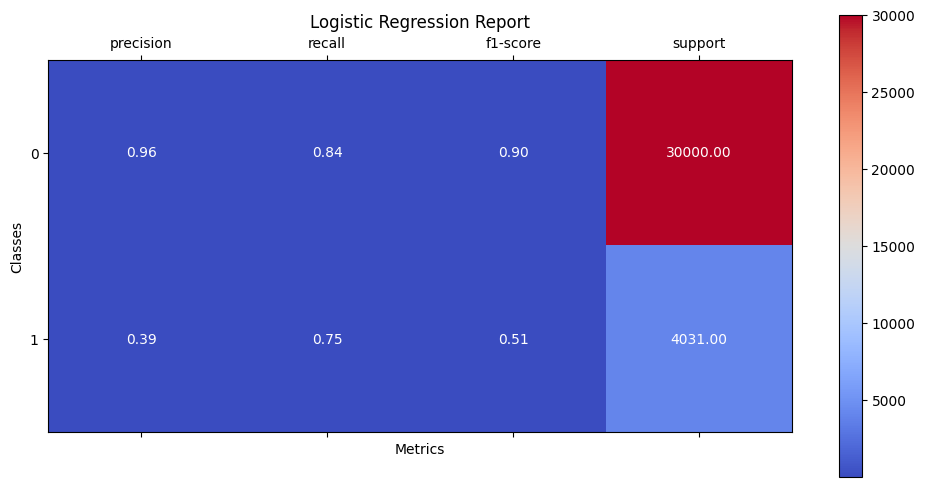

#######Decision TreeReport:
Accuracy: 87.39%
Confusion Matrix:
 [[28201  1799]
 [ 2492  1539]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     30000
           1       0.46      0.38      0.42      4031

    accuracy                           0.87     34031
   macro avg       0.69      0.66      0.67     34031
weighted avg       0.86      0.87      0.87     34031





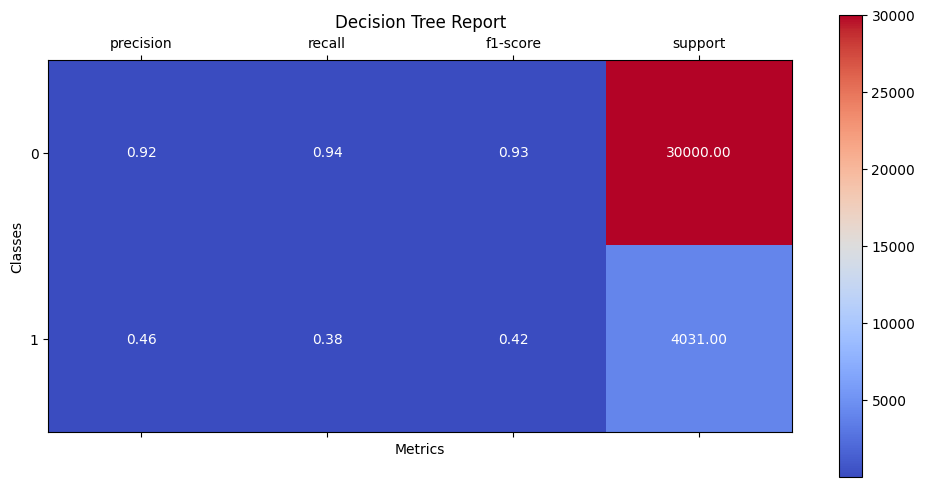

#######Random Forest ClassifierReport:
Accuracy: 89.60%
Confusion Matrix:
 [[28867  1133]
 [ 2406  1625]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     30000
           1       0.59      0.40      0.48      4031

    accuracy                           0.90     34031
   macro avg       0.76      0.68      0.71     34031
weighted avg       0.88      0.90      0.89     34031





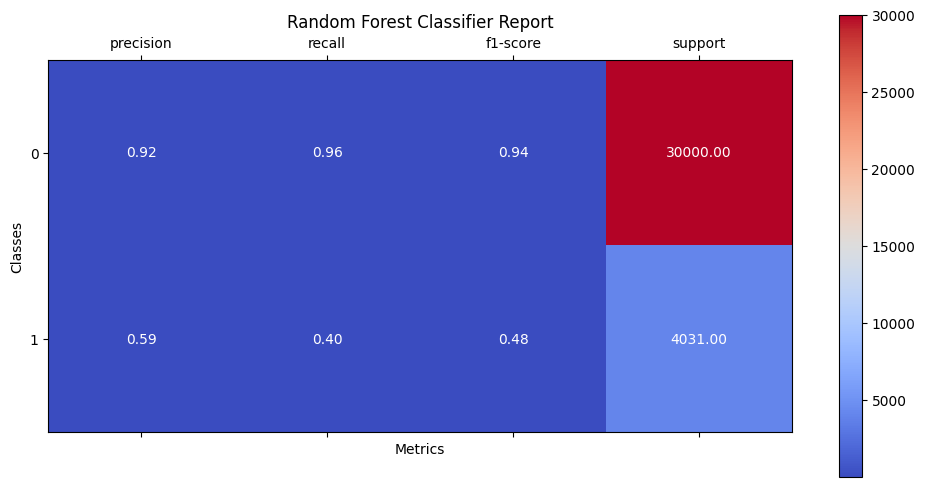

#######AdaBoost ClassifierReport:
Accuracy: 91.04%
Confusion Matrix:
 [[29266   734]
 [ 2316  1715]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     30000
           1       0.70      0.43      0.53      4031

    accuracy                           0.91     34031
   macro avg       0.81      0.70      0.74     34031
weighted avg       0.90      0.91      0.90     34031





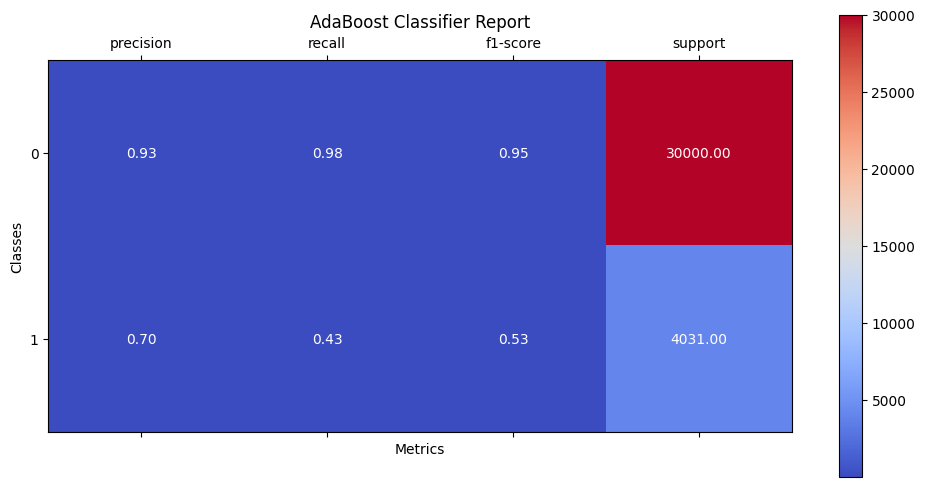

#######Gradient Boosting ClassifierReport:
Accuracy: 91.22%
Confusion Matrix:
 [[29150   850]
 [ 2139  1892]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     30000
           1       0.69      0.47      0.56      4031

    accuracy                           0.91     34031
   macro avg       0.81      0.72      0.75     34031
weighted avg       0.90      0.91      0.90     34031





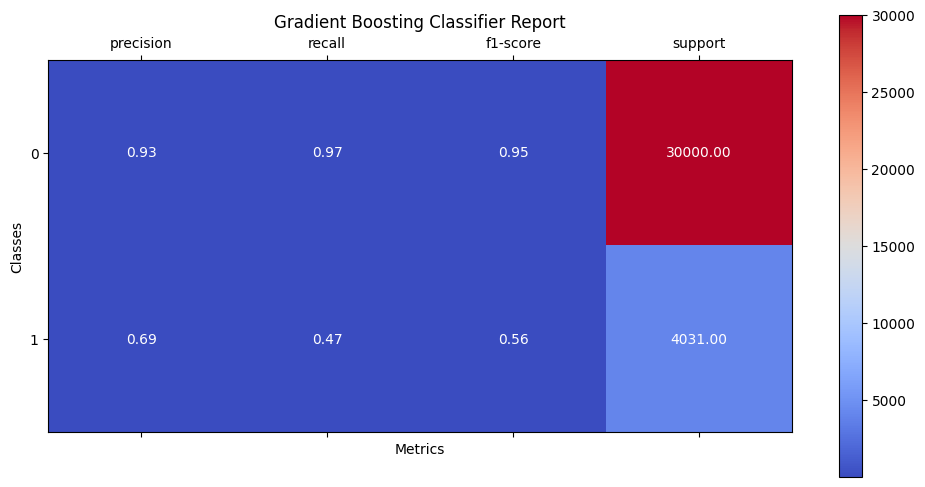

#######XGBoost classifierReport:
Accuracy: 90.86%
Confusion Matrix:
 [[29109   891]
 [ 2219  1812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     30000
           1       0.67      0.45      0.54      4031

    accuracy                           0.91     34031
   macro avg       0.80      0.71      0.74     34031
weighted avg       0.90      0.91      0.90     34031





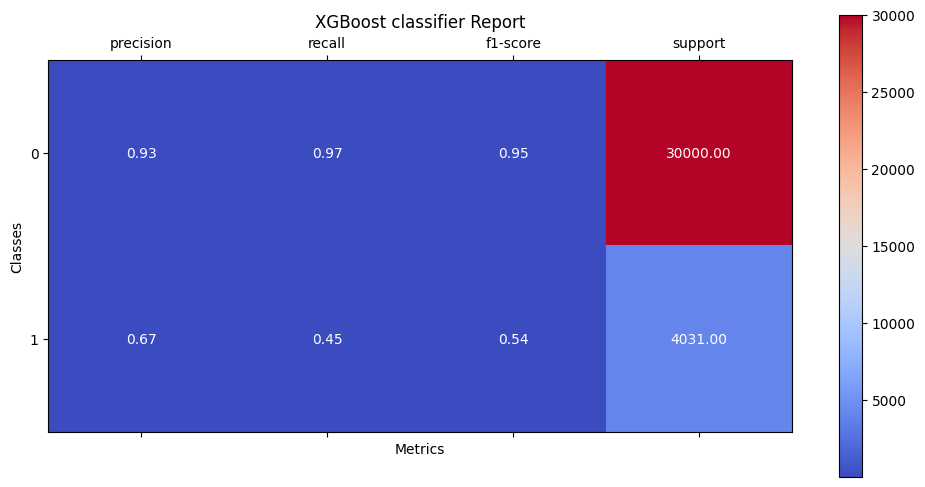

In [87]:
## Base Model development
# split train test
y = df_new['HadHeartAttack']
#X = df_new[['PhysicalHealthDays','HadStroke','HadAngina','DifficultyWalking','HadKidneyDisease','HadCOPD','DeafOrHardOfHearing','HadArthritis','DifficultyErrands','DifficultyDressingBathing','BMI_0.0','BMI_1.0','BMI_2.0','BMI_3.0','BMI_4.0','BMI_5.0']]
X = df_new[['HadAngina','RemovedTeeth_0.0','RemovedTeeth_1.0','RemovedTeeth_3.0','DifficultyWalking','ChestScan','HadCOPD','HadDiabetes_0.0','HadDiabetes_1.0','HadDiabetes_2.0','HadDiabetes_3.0','PhysicalHealthDays','GeneralHealth_0.0','GeneralHealth_1.0','GeneralHealth_2.0','GeneralHealth_3.0','GeneralHealth_4.0','HighRiskLastYear','PhysicalActivities','Sex_enc','AlcoholDrinkers','LastCheckupTime_0.0','LastCheckupTime_1.0','LastCheckupTime_2.0','LastCheckupTime_3.0','TetanusLast10Tdap_0.0','TetanusLast10Tdap_1.0','TetanusLast10Tdap_2.0','TetanusLast10Tdap_3.0','RaceEthnicityCategory_0.0','RaceEthnicityCategory_1.0','RaceEthnicityCategory_2.0','RaceEthnicityCategory_3.0','RaceEthnicityCategory_4.0']]

#X= df_new.drop(['HadHeartAttack'],axis=1)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)
LrModel = LogisticRegression(class_weight="balanced")
DtModel = DecisionTreeClassifier()
Rfmodel = RandomForestClassifier()
Abmodel = AdaBoostClassifier()
Gbmodel = GradientBoostingClassifier()
Xgbmodel = XGBClassifier()
# Evaluate the model
modellist = ['Logistic Regression','Decision Tree', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'XGBoost classifier']
i = 0
def plot_report(report, modelname):
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = np.array([[report[label][metric] for metric in metrics] for label in labels])
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(data, cmap='coolwarm')
    plt.xticks(range(len(metrics)), metrics)
    plt.yticks(range(len(labels)), labels)
    plt.colorbar(cax)
    # Adding the text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title(modelname + ' Report')
    plt.show()
for model in [LrModel,DtModel,Rfmodel,Abmodel,Gbmodel,Xgbmodel]:
#for model in [LrModel]:
  model_fit = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print('#######'+ modellist[i]+'Report:')
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  print("\nClassification Report:\n", classification_report(y_test, y_pred))
  print("\n")
  plot_report(classification_report(y_test, y_pred, output_dict=True), modellist[i])
  i = i+1

In [88]:
!pip install --upgrade scikit-learn

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

Rfmodel = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform RandomizedSearchCV for RandomForest
rf_grid = RandomizedSearchCV(estimator=Rfmodel, param_distributions=param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Random Forest:")
print("Best hyperparameters:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))

Xgbmodel = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 0.9]
}

# Perform RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(estimator=Xgbmodel, param_distributions=param_dist, cv=5, scoring='f1', n_iter=10, n_jobs=-1)
xgb_random.fit(X_train, y_train)

# Best model and evaluation
best_xgb_model = xgb_random.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("XGBoost:")
print("Best hyperparameters:", xgb_random.best_params_)
print(classification_report(y_test, y_pred_xgb))


Random Forest:
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': None, 'max_depth': 10}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     30000
           1       0.68      0.47      0.55      4031

    accuracy                           0.91     34031
   macro avg       0.80      0.72      0.75     34031
weighted avg       0.90      0.91      0.90     34031



AttributeError: 'super' object has no attribute '__sklearn_tags__'

Best RandomForestClassifier:
Accuracy: 0.910728453468896
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     30000
           1       0.68      0.47      0.55      4031

    accuracy                           0.91     34031
   macro avg       0.80      0.72      0.75     34031
weighted avg       0.90      0.91      0.90     34031



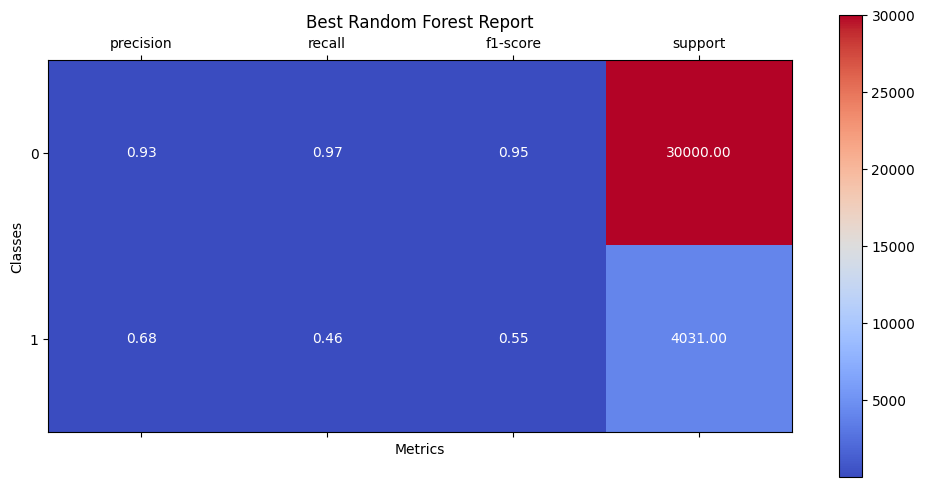


Best XGBClassifier:
Accuracy: 0.9112279980018219
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     30000
           1       0.68      0.46      0.55      4031

    accuracy                           0.91     34031
   macro avg       0.81      0.72      0.75     34031
weighted avg       0.90      0.91      0.90     34031



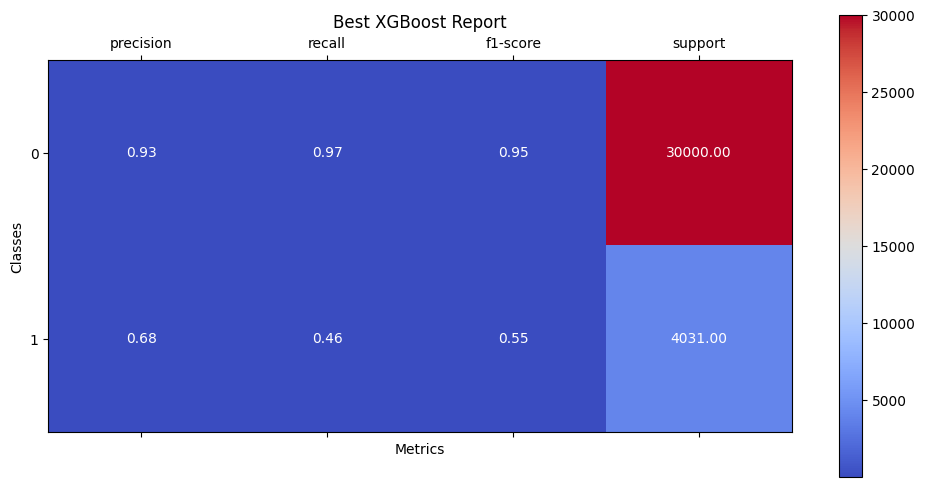

In [90]:
# Best Random Forest model
best_rf_params = {'n_estimators': 50, 'min_samples_split': 5, 'max_features': None, 'max_depth': 10}
best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)
print("Best RandomForestClassifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
plot_report(classification_report(y_test, y_pred_best, output_dict=True), 'Best Random Forest')


# Best XGBoost model
best_xgb_params = {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
best_xgb_model = XGBClassifier(**best_xgb_params)
best_xgb_model.fit(X_train, y_train)
y_pred_xgb = best_xgb_model.predict(X_test)
print("\nBest XGBClassifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))
plot_report(classification_report(y_test, y_pred_best, output_dict=True), 'Best XGBoost')

In [91]:
!pip install scikeras

In [94]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Check TensorFlow GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# If a GPU is available, set memory growth (to prevent consuming all GPU memory upfront)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Define the model function
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["f1_score"])
    return model

# Wrap the Keras model with scikit-learn's KerasClassifier
model = KerasClassifier(model=create_model, verbose=1)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'model__neurons': [128, 256],
    'batch_size': [512, 1024],
    'epochs': [10, 20],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=5,
    n_jobs=-1  # Parallelize across CPUs, GPU training is handled by TensorFlow
)

# Fit the GridSearchCV to find the best model
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)

# Print classification report
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plot_report(classification_report(y_test, y_pred, output_dict=True), 'Neural Network')

Num GPUs Available:  0


AttributeError: 'super' object has no attribute '__sklearn_tags__'